<a href="https://colab.research.google.com/github/ArpanSM/Machine_Learning_Hackathons/blob/master/Amazon_ML_Engineer_Hiring_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Notebook Outline


---
###Data loading and Missing data analysis


---
###Exploratory Data Analysis

* Data distribution analysis and outlier removal.
* Visualizing and analyzing the patterns on the independent data using dependent data.


---
###Data preprocessing and Feature engineering

* One hot encoding of categorical data
* KNN imputation on both train and test dataset.
* Feature Engineering such as column multiplication and ratio to get more insights as well as improve model performance.



---
###Machine Learning Classification Modelling

* Testing various machine learning classification algorithms to identify the best ones.
* Performing hyperparameter tuning on those models.
* Analyzing confusion metrics and precision scores.
* Stacking all the tuned models to get the best performance.
* Finally, training the stacked model on the whole training set and predicting on test set.


---

##Final Score on test dataset - 98.40 


---



---





##Data Loading and Missing Data Analysis

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/amazon-ml-engineer-hiring-challenge/amazon-ml-2020-predict-the-category-of-the-customer-5-c575cc6b/9e5938fc2ce611eb.zip
!unzip 9e5938fc2ce611eb.zip

--2020-12-06 13:03:14--  https://he-s3.s3.amazonaws.com/media/hackathon/amazon-ml-engineer-hiring-challenge/amazon-ml-2020-predict-the-category-of-the-customer-5-c575cc6b/9e5938fc2ce611eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.116
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373655 (1.3M) [application/zip]
Saving to: ‘9e5938fc2ce611eb.zip’

9e5938fc2ce611eb.zi 100%[===================>]   1.31M   776KB/s    in 1.7s    

2020-12-06 13:03:17 (776 KB/s) - ‘9e5938fc2ce611eb.zip’ saved [1373655/1373655]

Archive:  9e5938fc2ce611eb.zip
  inflating: train.csv               
  inflating: test.csv                


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
dft = pd.read_csv("/content/test.csv")

In [ ]:
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [ ]:
dft.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [ ]:
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [ ]:
dft.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7160 non-null   object 
 1   customer_visit_score              7160 non-null   float64
 2   customer_product_search_score     7131 non-null   float64
 3   customer_ctr_score                7160 non-null   float64
 4   customer_stay_score               7144 non-null   float64
 5   customer_frequency_score          7160 non-null   float64
 6   customer_product_variation_score  7117 non-null   float64
 7   customer_order_score              7119 non-null   float64
 8   customer_affinity_score           7160 non-null   float64
 9   customer_active_segment           7148 non-null   object 
 10  X1                                7135 non-null   object 
dtypes: float64(8), object(3)
memory usage: 615.4+ KB


In [ ]:
df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [ ]:
dft.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [ ]:
!pip install quilt
import missingno as msno

The nullity matrix gives you a data-dense display which lets you quickly visually pick out the missing data patterns in the dataset.Also, the sparkline on the right gives you a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows.

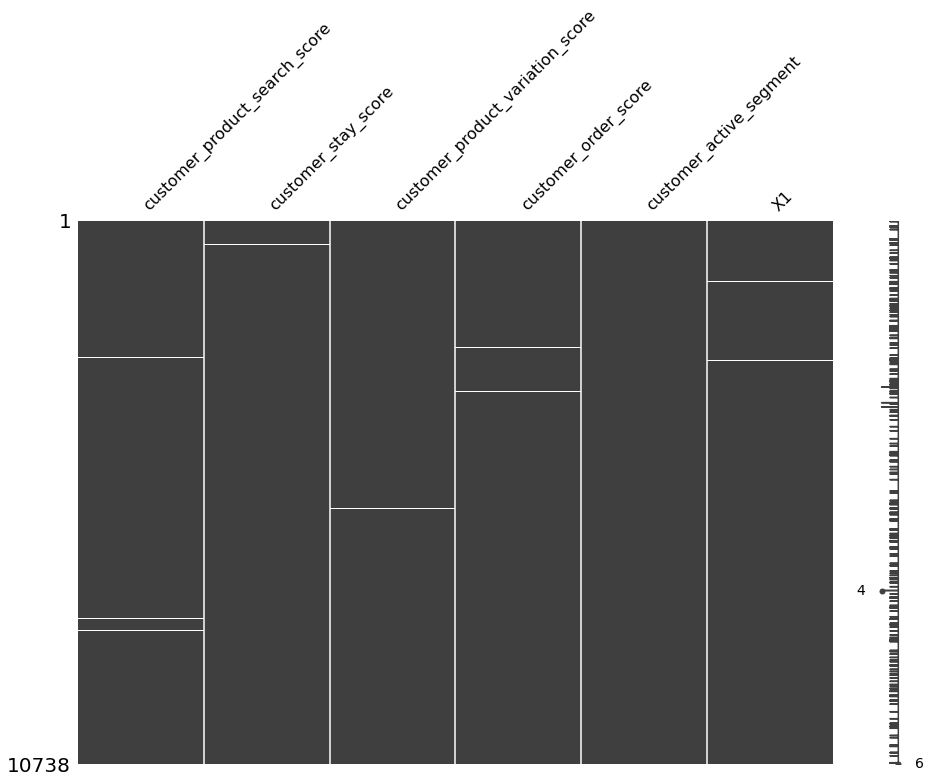

In [ ]:
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df],figsize=(15, 10))

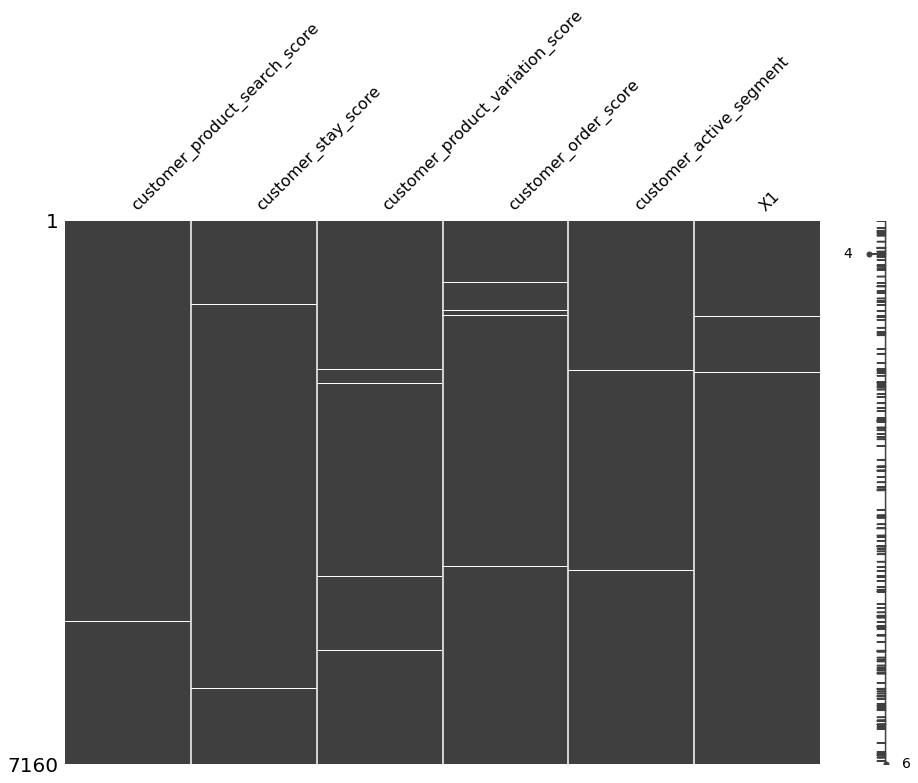

In [ ]:
missingdata_dft = dft.columns[dft.isnull().any()].tolist()
msno.matrix(dft[missingdata_dft],figsize=(15, 10))

The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better visualize features with very large missing values.

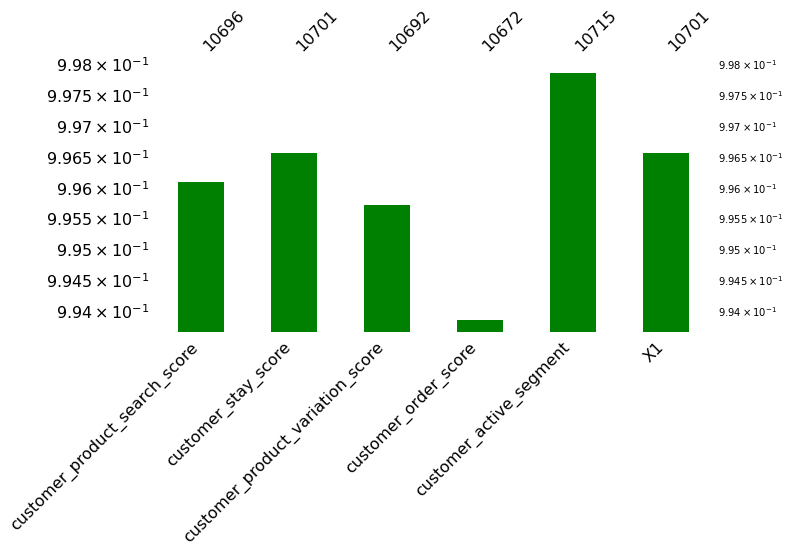

In [ ]:
msno.bar(df[missingdata_df], color="green", log=True, figsize=(10,5))

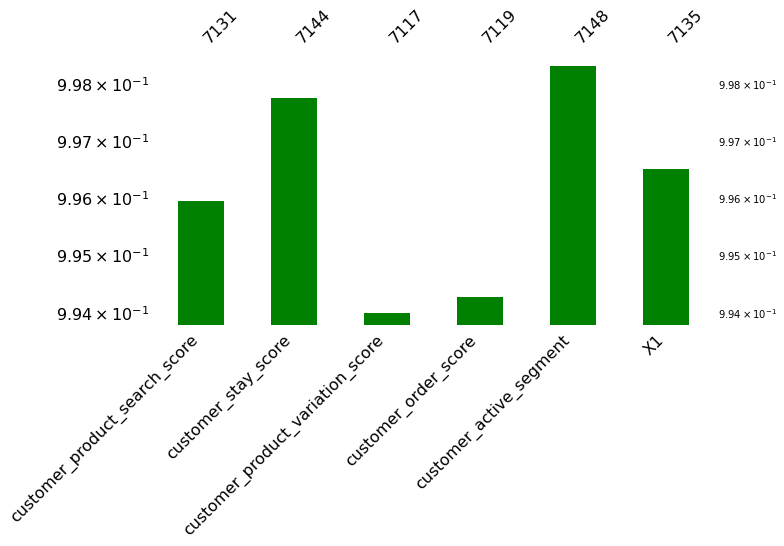

In [ ]:
msno.bar(dft[missingdata_dft], color="green", log=True, figsize=(10,5))

Finally, a simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

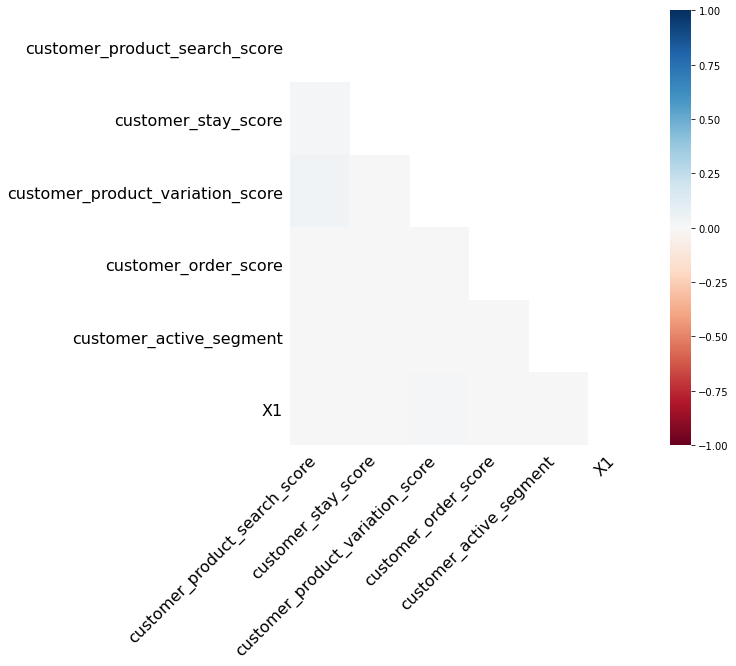

In [ ]:
msno.heatmap(df[missingdata_df], figsize=(8,8))

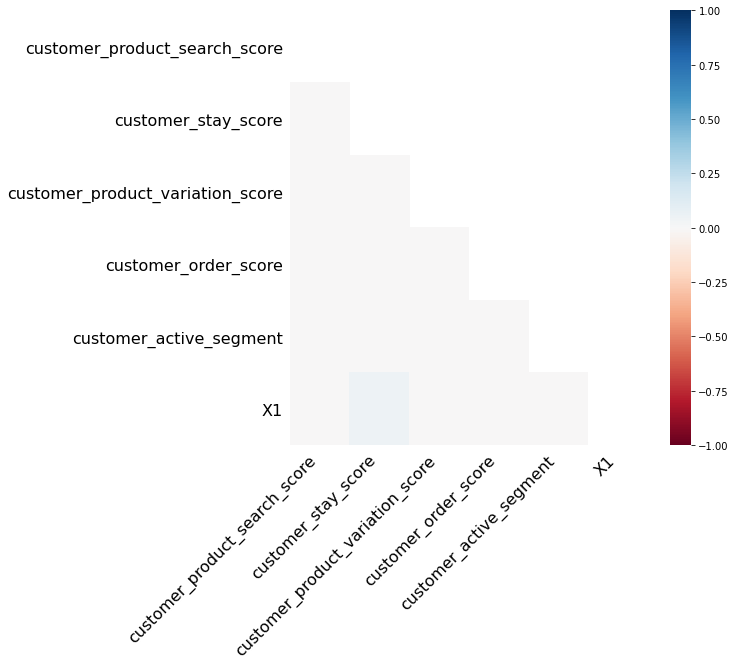

In [ ]:
msno.heatmap(dft[missingdata_dft], figsize=(8,8))

Reviewing the above graph, it seems we don't have large about of null data. Since both train and test data have null values, we won't drop it. Instead we would impute it using KNN imputation.

##EDA

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

####Outlier Detection and Removal

Here we compare every numerical data in our train dataset with respect to test dataset. If any major outlier is found while comparing the boxplot of numerical independent variable, we remove such as data points from the training set.

`customer_visit_score`

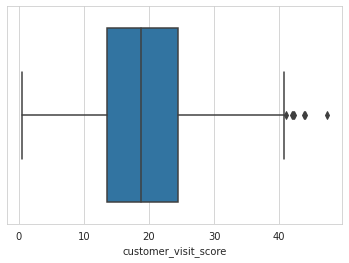

In [ ]:
sns.boxplot(x=df['customer_visit_score'])

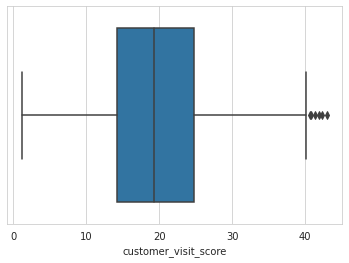

In [ ]:
sns.boxplot(x=dft['customer_visit_score'])

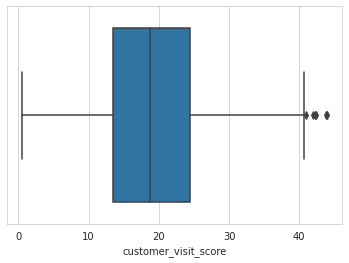

In [ ]:
df.drop(df[df.customer_visit_score>45].index, inplace=True)
sns.boxplot(x=df['customer_visit_score'])

`customer_product_search_score`

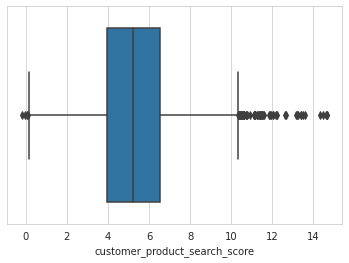

In [ ]:
sns.boxplot(x=df['customer_product_search_score'])

In [ ]:
df.drop(df[df.customer_product_search_score>15].index, inplace=True)

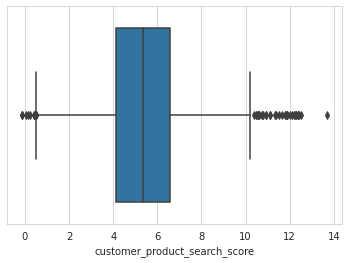

In [ ]:
sns.boxplot(x=dft['customer_product_search_score'])

`customer_ctr_score`

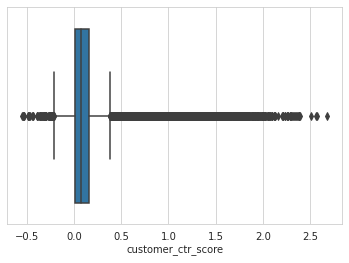

In [ ]:
sns.boxplot(x=df['customer_ctr_score'])

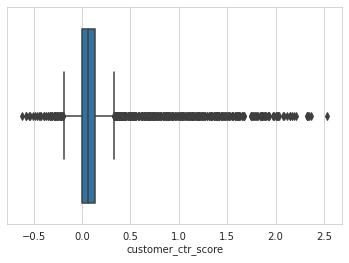

In [ ]:
sns.boxplot(x=dft['customer_ctr_score'])

`customer_stay_score`

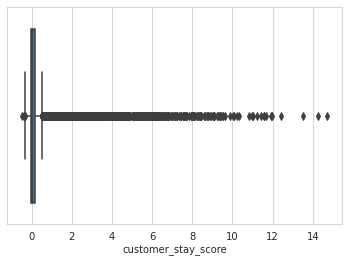

In [ ]:
sns.boxplot(x=df['customer_stay_score'])

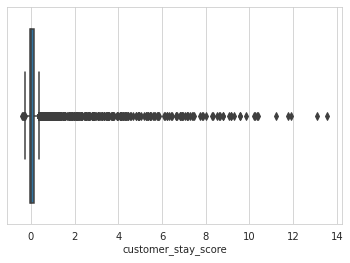

In [ ]:
sns.boxplot(x=dft['customer_stay_score'])

`customer_frequency_score`

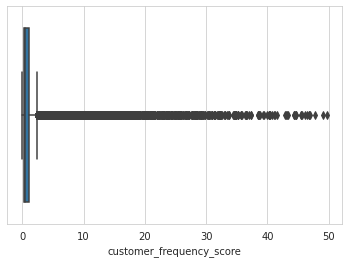

In [ ]:
sns.boxplot(x=df['customer_frequency_score'])

In [ ]:
df.drop(df[df.customer_frequency_score>50].index, inplace=True)

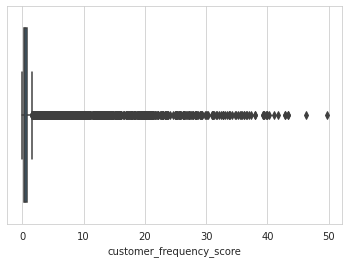

In [ ]:
sns.boxplot(x=dft['customer_frequency_score'])

`customer_product_variation_score`

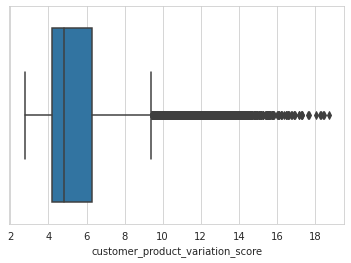

In [ ]:
sns.boxplot(x=df['customer_product_variation_score'])

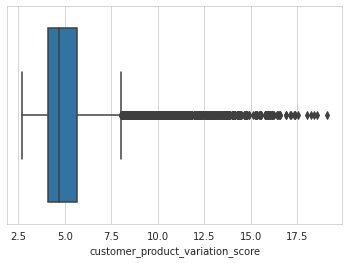

In [ ]:
sns.boxplot(x=dft['customer_product_variation_score'])

`customer_order_score`

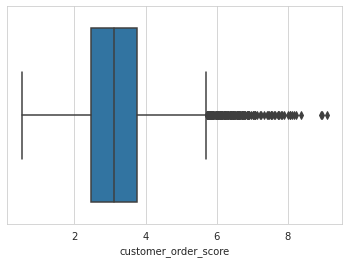

In [ ]:
sns.boxplot(x=df['customer_order_score'])

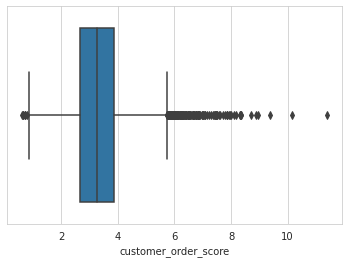

In [ ]:
sns.boxplot(x=dft['customer_order_score'])

`customer_affinity_score`

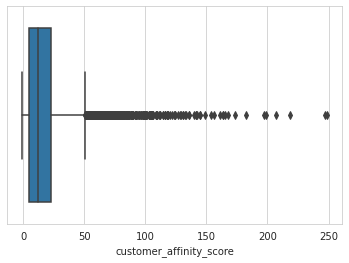

In [ ]:
sns.boxplot(x=df['customer_affinity_score'])

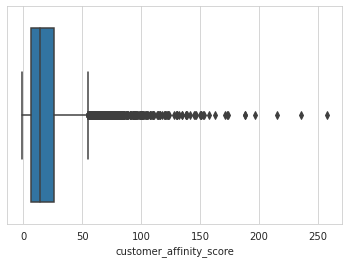

In [ ]:
sns.boxplot(x=dft['customer_affinity_score'])

By analyzing mean, standard deviation, min and max of all numeric columns ofboth training and test set, we observe than the mean and variance for both of them are almost same. So we can proceed with further steps.

In [ ]:
df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10733.000000,10691.000000,10733.000000,10696.000000,10733.000000,10687.000000,10667.000000,10733.000000,10733.000000
mean,19.055775,5.271526,0.176016,0.374456,2.368081,5.786804,3.150864,17.069368,0.120656
std,7.413845,1.873770,0.372853,1.222264,5.575667,2.530719,1.034919,18.763800,0.325742
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.537137,-0.486834,0.000000
25%,13.516963,3.970963,0.010843,-0.027567,0.313595,4.193017,2.455124,4.541390,0.000000
50%,18.770642,5.218149,0.074214,0.037218,0.516772,4.842076,3.119300,12.667113,0.000000
75%,24.487677,6.517631,0.159698,0.179052,1.123600,6.281539,3.757369,23.121942,0.000000
max,43.926748,14.653195,2.679474,14.701914,49.679380,18.743836,9.090206,248.552755,1.000000


In [ ]:
dft.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


####Categorical Variable Analysis

The figure below shows imbalanced dataset where majority of customers lie in category 0 as comapred category 1

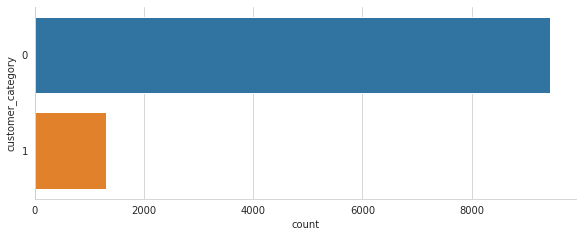

In [ ]:
ax = sns.catplot(y="customer_category", kind="count", data=df, height=3.2, aspect=2.5, orient='h')

The figure below shows the count of different `customer_sctive_segment` in train and test dataset. Category `C` and `B` are  the highest in both dataset.

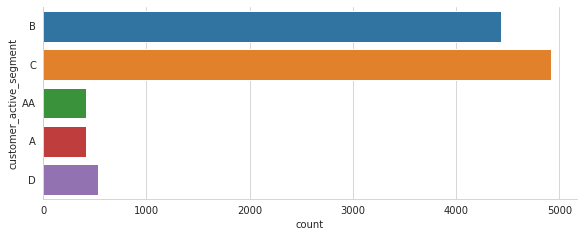

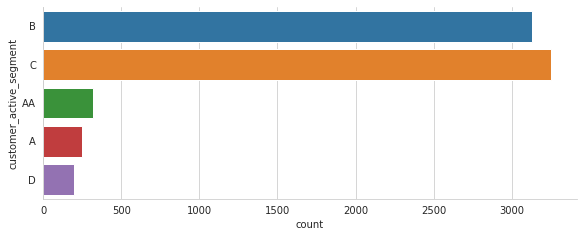

In [ ]:
ax = sns.catplot(y="customer_active_segment", kind="count", data=df, height=3.2, aspect=2.5, orient='h',order = ["B","C","AA","A","D"])
ax = sns.catplot(y="customer_active_segment", kind="count", data=dft, height=3.2, aspect=2.5, orient='h',order = ["B","C","AA","A","D"])

The figure below shows the count of different `X1` in train and test dataset. Category `BA` is the highest in both dataset.

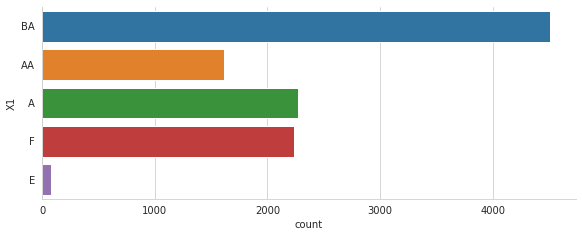

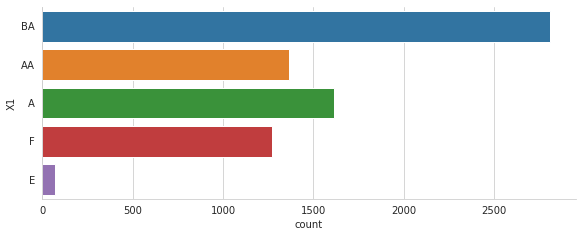

In [ ]:
ax = sns.catplot(y="X1", kind="count", data=df, height=3.2, aspect=2.5, orient='h', order = ["BA","AA","A","F","E"])
ax = sns.catplot(y="X1", kind="count", data=dft, height=3.2, aspect=2.5, orient='h', order = ["BA","AA","A","F","E"])

Plot below shows the data distribution of `customer_active_segment` on `customer_visit_score` on both train and test dataset. For instane, category `C` ranges from 1 to 30 in both dataset and similarly for other categories. Distribution is similar in both train and test set.

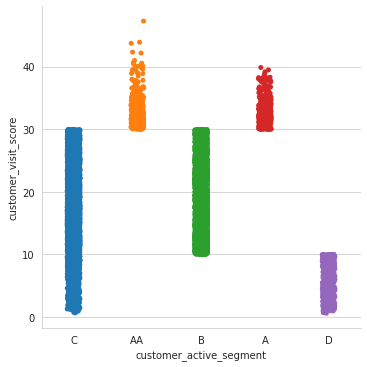

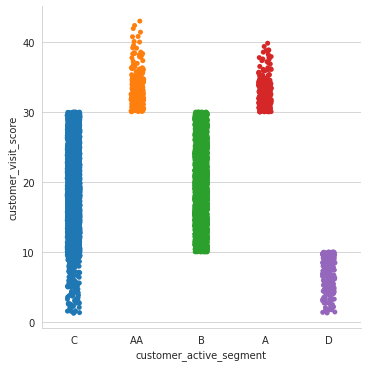

In [ ]:
sns.catplot(x="customer_active_segment", y="customer_visit_score", data=df, order=["C", "AA", "B", "A", "D"])
sns.catplot(x="customer_active_segment", y="customer_visit_score", data=dft, order=["C", "AA", "B", "A", "D"])

The plot below shows a possible outlier in D where one point is near 15 whereas high point is test dataset is below 10.

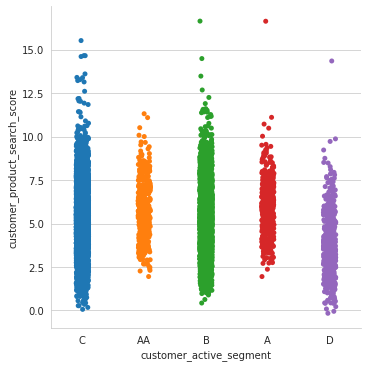

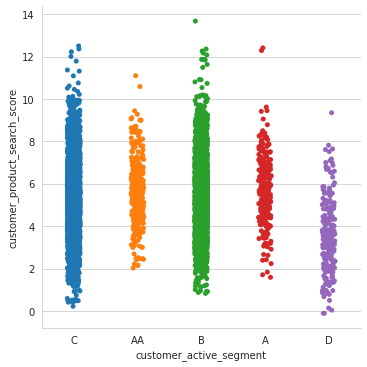

In [ ]:
sns.catplot(x="customer_active_segment", y="customer_product_search_score", data=df, order=["C", "AA", "B", "A", "D"])
sns.catplot(x="customer_active_segment", y="customer_product_search_score", data=dft, order=["C", "AA", "B", "A", "D"])

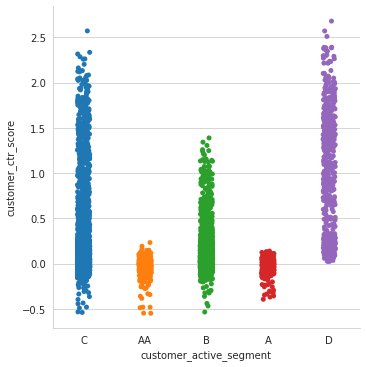

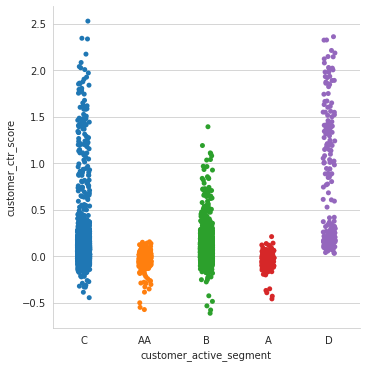

In [ ]:
sns.catplot(x="customer_active_segment", y="customer_ctr_score", data=df, order=["C", "AA", "B", "A", "D"])
sns.catplot(x="customer_active_segment", y="customer_ctr_score", data=dft, order=["C", "AA", "B", "A", "D"])

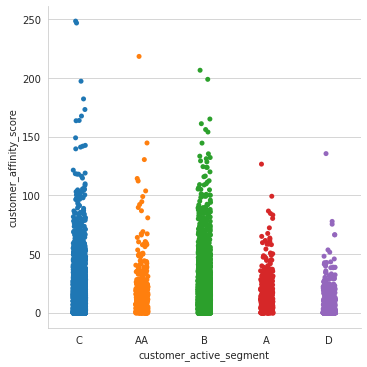

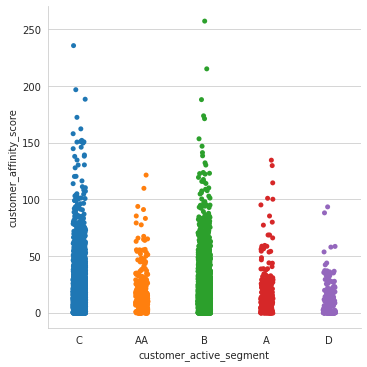

In [ ]:
sns.catplot(x="customer_active_segment", y="customer_affinity_score", data=df, order=["C", "AA", "B", "A", "D"])
sns.catplot(x="customer_active_segment", y="customer_affinity_score", data=dft, order=["C", "AA", "B", "A", "D"])

Plot below shows the data distribution of `X1` on `customer_visit_score` on both train and test dataset. For instane, category `A` ranges from 8 to 38 in both dataset and similarly for other categories. Distribution is similar in both train and test set.

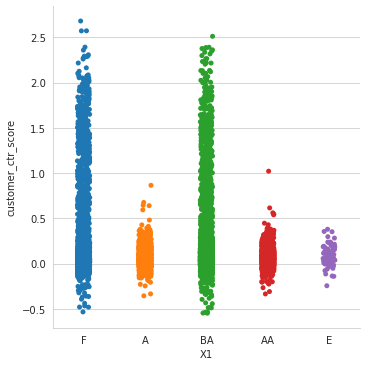

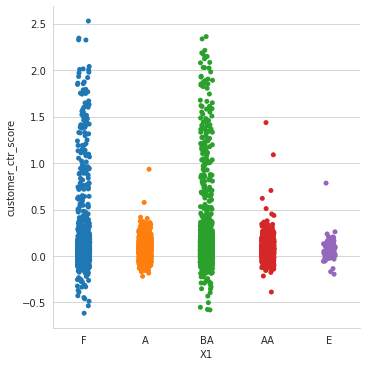

In [ ]:
sns.catplot(x="X1", y="customer_ctr_score", data=df, order=["F", "A", "BA", "AA", "E"])
sns.catplot(x="X1", y="customer_ctr_score", data=dft, order=["F", "A", "BA", "AA", "E"])

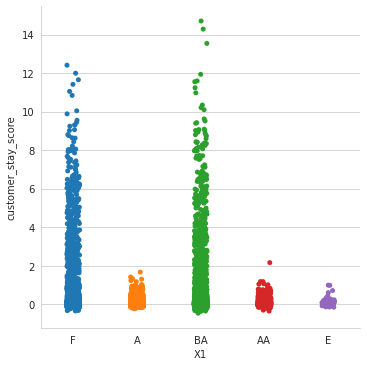

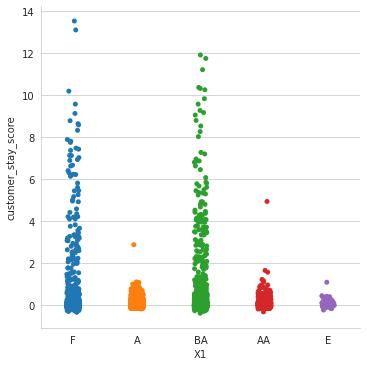

In [ ]:
sns.catplot(x="X1", y="customer_stay_score", data=df, order=["F", "A", "BA", "AA", "E"])
sns.catplot(x="X1", y="customer_stay_score", data=dft, order=["F", "A", "BA", "AA", "E"])

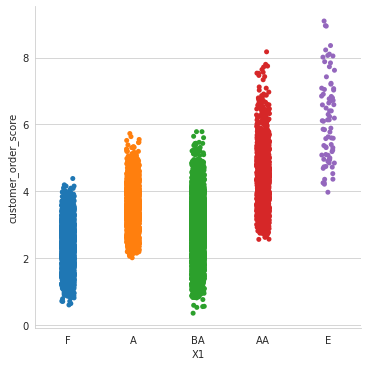

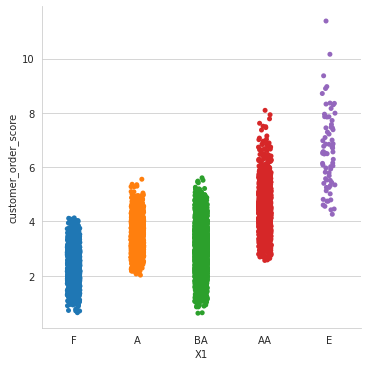

In [ ]:
sns.catplot(x="X1", y="customer_order_score", data=df, order=["F", "A", "BA", "AA", "E"])
sns.catplot(x="X1", y="customer_order_score", data=dft, order=["F", "A", "BA", "AA", "E"])

The following violin plots shows the distribution of `customer_category` in `customer_visit_score`. For instance we can observe that, in category `C` values from 0 to 20 are in category 1 whereas from 10 to 30 are generally in category 0

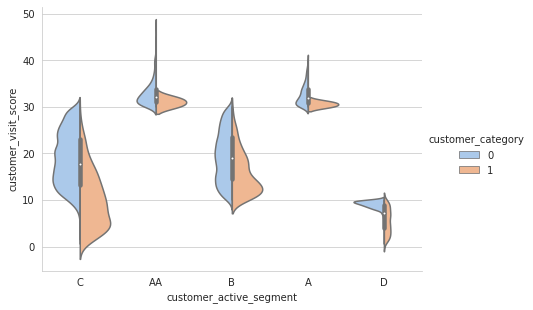

In [ ]:
ax = sns.catplot(x="customer_active_segment", y="customer_visit_score", hue="customer_category", kind="violin", split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

The following violin plots shows the distribution of customer_category in customer_order_score.

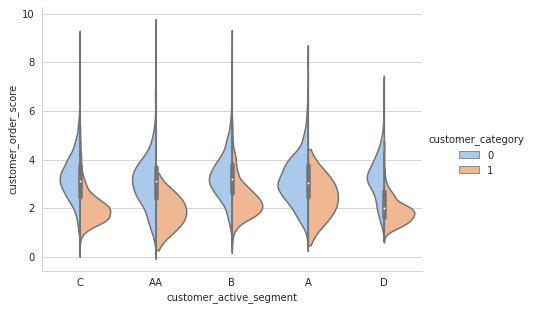

In [ ]:
ax = sns.catplot(x="customer_active_segment", y="customer_order_score", hue="customer_category", kind="violin", split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

The following violin plots shows the distribution of `customer_category` in `customer_product_search_score`. For instance we can observe that, in category `E` values from 5 to 8 are in category 1 whereas from 2.5 to 10 are generally in category 0

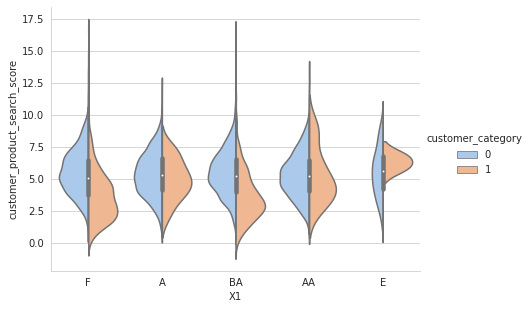

In [ ]:
ax = sns.catplot(x="X1", y="customer_product_search_score", hue="customer_category", kind="violin", split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

####Numerical Variable Analysis

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['customer_category'] == 0][feature].dropna(), color= 'navy', label= 'Category: 0')
    ax1 = sns.kdeplot(df[df['customer_category'] == 1][feature].dropna(), color= 'orange', label= 'Category: 1')


Category 1 visit score is around 8 whereas Category 0 score tends to be around 20, meaning category 0 visit website more regularly comapred to category 1.

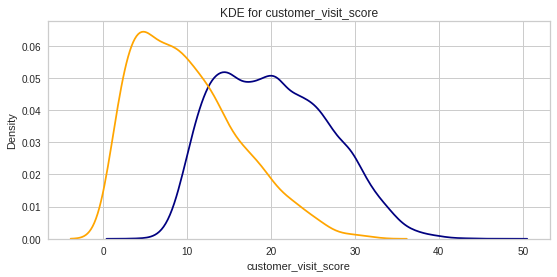

In [ ]:
#a score based on how regularly the customer visits the website
kdeplot('customer_visit_score')

Category 1 product search score is around 2.5 whereas Category 0 score tends to be around 5. Category 0 have higher product search score compared to Category 1.

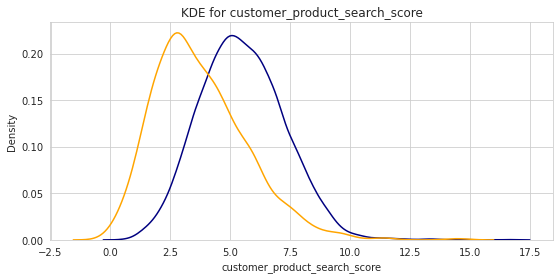

In [ ]:
#quality or price range of product that the customer searches for.
kdeplot('customer_product_search_score')

Category 1 ctr_score is higher comapared Category 0 meaning category 1 clicked more times on the product compared to category 0.

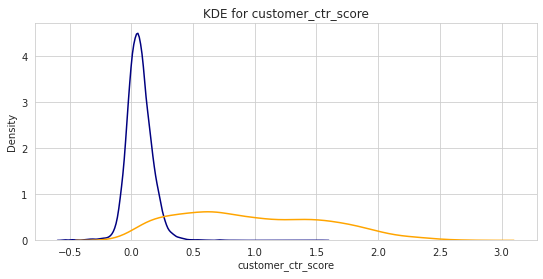

In [ ]:
#how many of the searched links does the customer click
kdeplot('customer_ctr_score')

Category 1 tends to spend more time on website compared to Category 0.

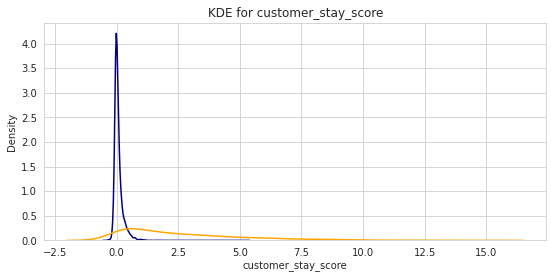

In [ ]:
#a score based on the time spent on an avg. by the customer
kdeplot('customer_stay_score')

Average category 1 visit the website a lot more times in a day compared to category 0.

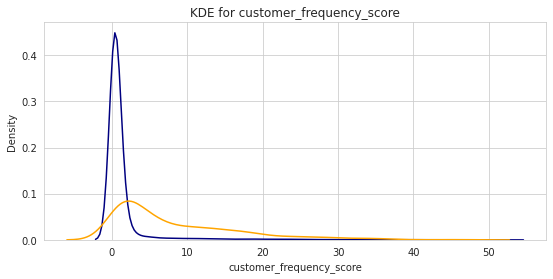

In [ ]:
#a score based on how many times in a day the customer visit the website
kdeplot('customer_frequency_score')

Category 1 tends to search for more varities of product as compared to category 0.

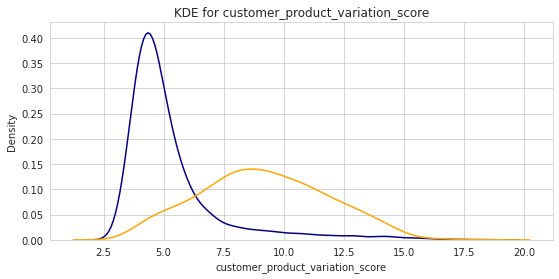

In [ ]:
#a score based on how many varities of products does a customer search for, for ex. electronics, apparels, etc.
kdeplot('customer_product_variation_score')

Category 0 have higher order score which signifies they are less proned to return the purchased product.

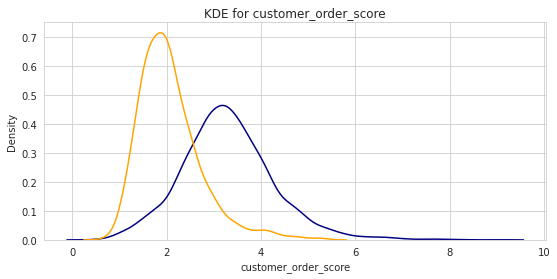

In [ ]:
#Score based on the no. of orders that has been succesfully delivered and not returned
kdeplot('customer_order_score')

Category 1 have lower affinity score comapared to category 0 which tells they have less affinity comapared to category 0.

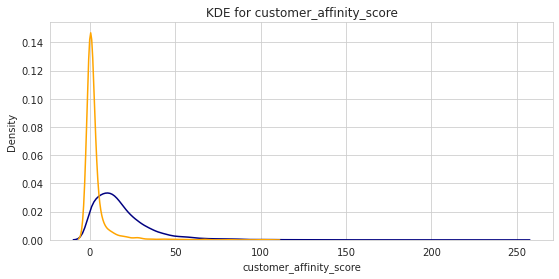

In [ ]:
#an internal overall score calculated which signifies the affinity of the customer towards the website
kdeplot('customer_affinity_score')

##Data Preprocessing

Using KNN imputation on both train and test set where K = 5 by default.

In [ ]:
!pip install fancyimpute
from fancyimpute import KNN 
knn_imputer = KNN(verbose=False) 

In [ ]:
def preprocessing():
  DF = pd.read_csv("/content/train.csv")
  DFT = pd.read_csv("/content/test.csv")
  #creating a copy of both train and test set.
  df = DF.copy()
  dft = DFT.copy()
  #removing the customer_id for now as it is a string and KNN imputation doesn't support categorical values
  del df['customer_id']
  del dft['customer_id']
  #renaming a value in 'X1' as it matches with values with 'customer_active_segment'
  df['X1'] = df['X1'].replace(to_replace ="A",value ="A1") 
  df['X1'] = df['X1'].replace(to_replace ="AA",value ="AA1") 
  dft['X1'] = dft['X1'].replace(to_replace ="A",value ="A1") 
  dft['X1'] = dft['X1'].replace(to_replace ="AA",value ="AA1")


  #one hot encoding 'customer_active_segment'
  one_hot = pd.get_dummies(df['customer_active_segment'])
  df = df.drop('customer_active_segment',axis = 1)
  df = df.join(one_hot)
  del df['C']
  one_hot = pd.get_dummies(dft['customer_active_segment'])
  dft = dft.drop('customer_active_segment',axis = 1)
  dft = dft.join(one_hot)
  del dft['C']

  #one hot encoding 'X1'
  one_hot = pd.get_dummies(df['X1'])
  df = df.drop('X1',axis = 1)
  df = df.join(one_hot)
  del df['F']
  one_hot = pd.get_dummies(dft['X1'])
  dft = dft.drop('X1',axis = 1)
  dft = dft.join(one_hot)
  del dft['F']

  #performing KNN imputation on train and test set.
  df = knn_imputer.fit_transform(df) 
  dft = knn_imputer.fit_transform(dft)
  #converting imputed data into dataframe
  df = pd.DataFrame(data=df)
  dft = pd.DataFrame(data=dft)

  #adding 'customer_id' back to imputed train and test set.
  df['customer_id'] = DF['customer_id']
  dft['customer_id'] = DFT['customer_id']
  return df,dft

df, dft = preprocessing()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,customer_id
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,csid_1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,csid_2
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,csid_3
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,csid_4
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,csid_5


In [ ]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,customer_id
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,csid_10739
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,csid_10740
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,csid_10741
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,csid_10742
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,csid_10743


In [ ]:
df.to_csv("knn_amzn_df.csv",index=False)
dft.to_csv("knn_amzn_dft.csv",index=False)

In [ ]:
!cp /content/knn_amzn_df.csv '/content/drive/MyDrive/Colab Weights'
!cp /content/knn_amzn_dft.csv '/content/drive/MyDrive/Colab Weights'

##Modelling

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Weights/knn_amzn_df.csv")
dft = pd.read_csv("/content/drive/MyDrive/Colab Weights/knn_amzn_dft.csv")

In [ ]:
#Converting dependent variable as a categorical data.
df['8'] = df['8'].astype('category')
#syncing our train and test column names
dft.rename(columns = {'8':'9',
                      '9':'10',
                      '10':'11',
                      '11':'12',
                      '12':'13',
                      '13':'14',
                      '14':'15',
                      '15':'16'}, inplace = True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,customer_id
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,csid_1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,csid_2
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,csid_3
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,csid_4
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,csid_5


In [ ]:
dft.head()

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,customer_id
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,csid_10739
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,csid_10740
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,csid_10741
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,csid_10742
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,csid_10743


In [ ]:
#installing PyCaret
!pip install pycaret

As for featuring engineering process, we would:
* Combine rare categorical levels.
* Transform dependent variables via yeo-johnson method.
* Normalzine numerical variable via zscore values.
* Multiply every numerical columns with each other.
* Divide every numerical columns with each other.
* Get polynomial features using every numerical columns with each other.
* Get trigonometric features using every numerical columns with each other.

In [ ]:
from pycaret.classification import *
exp_clf = setup(df,
                target='8',
                use_gpu = False,
                #numeric_imputation = 'mean', #median
                #categorical_imputation = 'mode', #constant
                #numeric_features = [],
                #categorical_features = ['8'],
                #date_features = [],
                ignore_features = ['customer_id'],
                #ordinal_features = {'column_name' : [‘low’, ‘medium’, ‘high’] },
                #high_cardinality_features = [],
                #high_cardinality_method = 'frequency', #clustering,
                #group_features = [],
                #handle_unknown_categorical = True,
                #unknown_categorical_method = 'least_frequent', or 'most_frequent',
                combine_rare_levels = True,
                #bin_numeric_features = ['0','1'],
                transformation = True,
                transformation_method = 'yeo-johnson',#'quantile',yeo-johnson,
                #transform_target = True,
                #transform_target_method = 'yeo-johnson', #box-cox
                feature_selection = True,
                normalize = True,
                normalize_method = 'zscore',#minmax ,maxabs ,robust, zscore,
                #fix_imbalance = True,
                #pca = True,
                #pca_method = 'incremental', #kernel, incremental, linear
                feature_interaction = True,
                feature_ratio = True,
                trigonometry_features=True,
                polynomial_features = True,
                log_experiment = True,
                experiment_name = 'amzn1')

,Description,Value
0,session_id,8968
1,Target,8
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10738, 18)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


Compare all available classifiers. We would be using Ridge and XGBoost and stacking them at the end.

In [ ]:
compare_models(sort = 'Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9693,0.0000,0.7765,0.9568,0.8568,0.8399,0.8459,0.022
lda,Linear Discriminant Analysis,0.9713,0.9672,0.7999,0.9508,0.8686,0.8526,0.8568,0.042
lr,Logistic Regression,0.9762,0.9770,0.8492,0.9456,0.8945,0.8811,0.8829,0.107
et,Extra Trees Classifier,0.9766,0.9724,0.8558,0.9427,0.8968,0.8837,0.8852,0.685
catboost,CatBoost Classifier,0.9771,0.9747,0.8637,0.9393,0.8996,0.8868,0.8879,6.720
lightgbm,Light Gradient Boosting Machine,0.9758,0.9735,0.8525,0.9388,0.8933,0.8797,0.8812,0.253
rf,Random Forest Classifier,0.9760,0.9717,0.8569,0.9368,0.8946,0.8812,0.8826,1.399
ada,Ada Boost Classifier,0.9742,0.9738,0.8402,0.9367,0.8854,0.8709,0.8728,0.617
knn,K Neighbors Classifier,0.9741,0.9477,0.8413,0.9344,0.8851,0.8705,0.8722,0.243
xgboost,Extreme Gradient Boosting,0.9753,0.9706,0.8547,0.9320,0.8914,0.8774,0.8787,1.456


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8968,
                solver='auto', tol=0.001)

####Ridge Classification

In [ ]:
#making ridge classifier model
ridge = create_model('ridge')
predict_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9654,0.0,0.7556,0.9444,0.8395,0.8204,0.8268
1,0.9654,0.0,0.7444,0.9571,0.8375,0.8185,0.8266
2,0.9734,0.0,0.8222,0.9487,0.8810,0.8661,0.8689
3,0.9774,0.0,0.8111,1.0000,0.8957,0.8832,0.8893
4,0.9707,0.0,0.7778,0.9722,0.8642,0.8480,0.8547
5,0.9801,0.0,0.8539,0.9744,0.9102,0.8990,0.9015
6,0.9694,0.0,0.7865,0.9459,0.8589,0.8419,0.8464
7,0.9601,0.0,0.7191,0.9275,0.8101,0.7882,0.7962
8,0.9574,0.0,0.6966,0.9254,0.7949,0.7716,0.7813
9,0.9734,0.0,0.7978,0.9726,0.8765,0.8618,0.8671


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9674,0.8795,0.7625,0.9683,0.8531,0.8351,0.8427


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0


In [ ]:
#hyperparameter tuning of ridge classifier model
tuned_ridge = tune_model(ridge, optimize='Precision', n_iter = 200)
predict_model(tuned_ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8976,0.0,0.1444,1.0,0.2524,0.2291,0.3597
1,0.8936,0.0,0.1111,1.0,0.2000,0.1804,0.3149
2,0.8949,0.0,0.1222,1.0,0.2178,0.1969,0.3304
3,0.8976,0.0,0.1444,1.0,0.2524,0.2291,0.3597
4,0.8949,0.0,0.1222,1.0,0.2178,0.1969,0.3304
5,0.8949,0.0,0.1124,1.0,0.2020,0.1825,0.3169
6,0.8908,0.0,0.0787,1.0,0.1458,0.1308,0.2645
7,0.8895,0.0,0.0674,1.0,0.1263,0.1130,0.2448
8,0.8868,0.0,0.0449,1.0,0.0860,0.0766,0.1996
9,0.9015,0.0,0.1685,1.0,0.2885,0.2633,0.3894


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8892,0.5538,0.1075,1.0,0.1941,0.1742,0.3089


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0


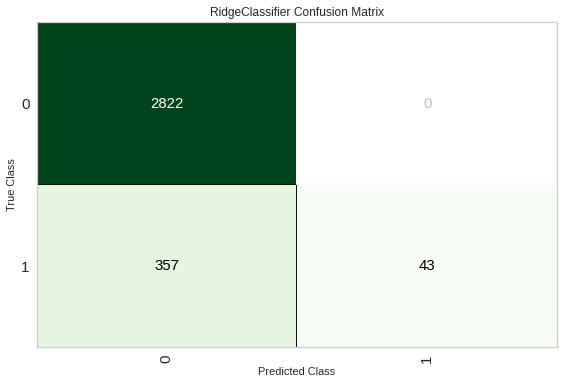

In [ ]:
plot_model(tuned_ridge, plot='confusion_matrix')

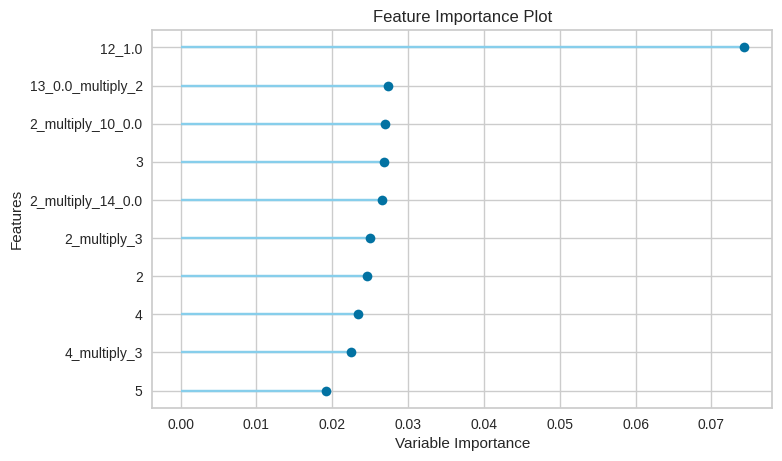

In [ ]:
plot_model(tuned_ridge, plot='feature')

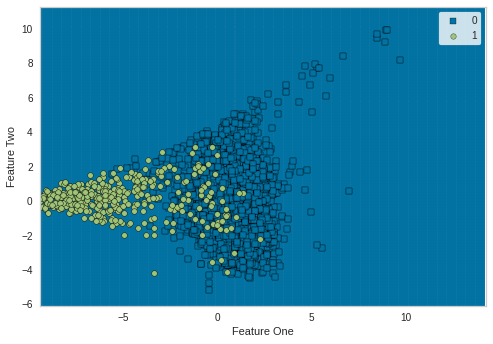

In [ ]:
plot_model(tuned_ridge, plot='boundary')

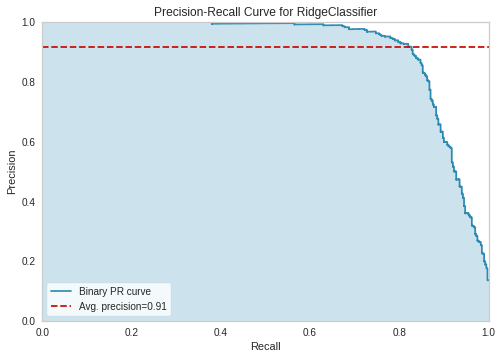

In [ ]:
plot_model(tuned_ridge, plot='pr')

In [ ]:
#traing on the whole dataset
finalize_model(tuned_ridge)
#predictiing on test data
test_predictions = predict_model(tuned_ridge, data=dft)
#storing the predictions in another dataframe and converting the dataframe to a csv file.
test_predictions.rename(columns = {'Label':'customer_category'}, inplace = True)
sub = test_predictions[['customer_id','customer_category']]
sub.to_csv("sub_ridge1.csv",index=False)

####Linear Discriminant Analysis

In [ ]:
#making Linear Discriminant Analysis
lda = create_model('lda')
predict_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9707,0.9759,0.8000,0.9474,0.8675,0.8512,0.8550
1,0.9707,0.9587,0.7889,0.9595,0.8659,0.8496,0.8547
2,0.9734,0.9717,0.8333,0.9375,0.8824,0.8674,0.8693
3,0.9787,0.9699,0.8222,1.0000,0.9024,0.8906,0.8960
4,0.9734,0.9906,0.8111,0.9605,0.8795,0.8647,0.8686
5,0.9774,0.9776,0.8539,0.9500,0.8994,0.8867,0.8883
6,0.9694,0.9585,0.7865,0.9459,0.8589,0.8419,0.8464
7,0.9614,0.9582,0.7416,0.9167,0.8199,0.7985,0.8041
8,0.9627,0.9388,0.7416,0.9296,0.8250,0.8044,0.8109
9,0.9747,0.9719,0.8202,0.9605,0.8848,0.8707,0.8742


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.968,0.9637,0.7825,0.9514,0.8587,0.8409,0.846


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label,Score
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0,1.0
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0,1.0
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0,1.0
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0,1.0
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0,1.0
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0,1.0
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0,1.0
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0,1.0


In [ ]:
#hyperparameter tuning of ridge classifier model
tuned_lda = tune_model(lda, optimize='Precision', n_iter = 200)
predict_model(tuned_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9707,0.9757,0.8000,0.9474,0.8675,0.8512,0.8550
1,0.9707,0.9576,0.7889,0.9595,0.8659,0.8496,0.8547
2,0.9734,0.9718,0.8333,0.9375,0.8824,0.8674,0.8693
3,0.9787,0.9700,0.8222,1.0000,0.9024,0.8906,0.8960
4,0.9734,0.9902,0.8111,0.9605,0.8795,0.8647,0.8686
5,0.9774,0.9774,0.8539,0.9500,0.8994,0.8867,0.8883
6,0.9694,0.9587,0.7865,0.9459,0.8589,0.8419,0.8464
7,0.9627,0.9582,0.7416,0.9296,0.8250,0.8044,0.8109
8,0.9614,0.9392,0.7303,0.9286,0.8176,0.7964,0.8035
9,0.9747,0.9727,0.8202,0.9605,0.8848,0.8707,0.8742


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.968,0.964,0.7825,0.9514,0.8587,0.8409,0.846


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label,Score
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0,1.0
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0,1.0
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0,1.0
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0,1.0
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0,1.0
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0,1.0
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0,1.0
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0,1.0


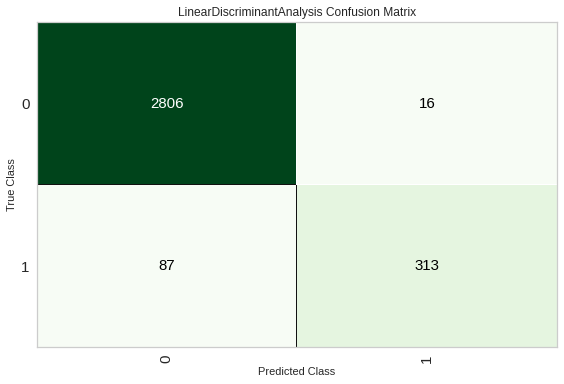

In [ ]:
plot_model(tuned_lda, plot='confusion_matrix')

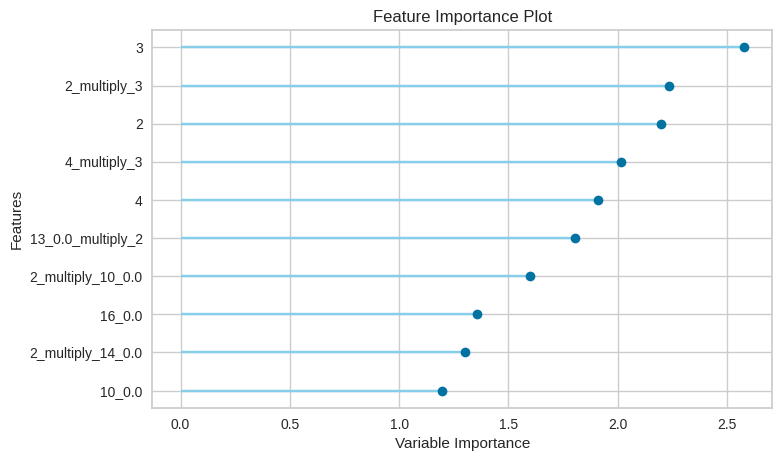

In [ ]:
plot_model(tuned_lda, plot='feature')

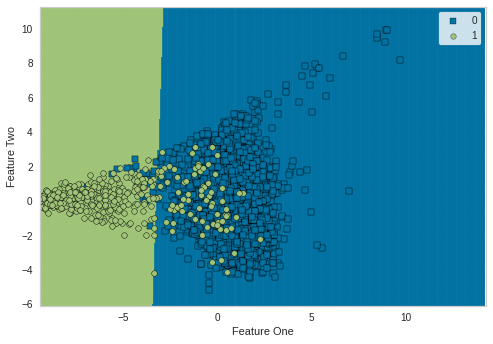

In [ ]:
plot_model(tuned_lda, plot='boundary')

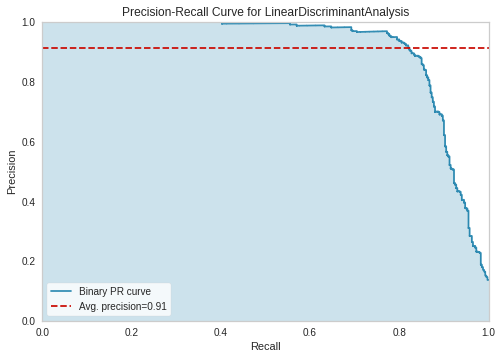

In [ ]:
plot_model(tuned_lda, plot='pr')

In [ ]:
#traing on the whole dataset
finalize_model(tuned_lda)
#predictiing on test data
test_predictions = predict_model(tuned_lda, data=dft)
#storing the predictions in another dataframe and converting the dataframe to a csv file.
test_predictions.rename(columns = {'Label':'customer_category'}, inplace = True)
sub = test_predictions[['customer_id','customer_category']]
sub.to_csv("sub_tuned_lda1.csv",index=False)

####Logistic Regression

In [ ]:
#making logistic
lr = create_model('lr')
predict_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9734,0.9780,0.8444,0.9268,0.8837,0.8687,0.8699
1,0.9721,0.9717,0.8000,0.9600,0.8727,0.8572,0.8617
2,0.9747,0.9745,0.8667,0.9176,0.8914,0.8771,0.8776
3,0.9801,0.9809,0.8556,0.9747,0.9112,0.9001,0.9025
4,0.9787,0.9911,0.8889,0.9302,0.9091,0.8970,0.8973
5,0.9867,0.9777,0.8989,0.9877,0.9412,0.9337,0.9350
6,0.9734,0.9780,0.8315,0.9367,0.8810,0.8660,0.8680
7,0.9734,0.9757,0.8315,0.9367,0.8810,0.8660,0.8680
8,0.9694,0.9693,0.8090,0.9231,0.8623,0.8451,0.8475
9,0.9800,0.9737,0.8652,0.9625,0.9112,0.9000,0.9016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9705,0.9688,0.8075,0.9472,0.8718,0.8553,0.8587


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label,Score
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0,0.9758
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0,0.9844
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0,0.9999
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0,0.9991
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0,0.9389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0,0.9988
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0,0.9812
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0,0.9934
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0,0.9662


In [ ]:
#hyperparameter tuning of ridge classifier model
tuned_lr = tune_model(lr, optimize='Precision', n_iter = 200)
predict_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9707,0.9787,0.8111,0.9359,0.8690,0.8527,0.8554
1,0.9707,0.9694,0.8000,0.9474,0.8675,0.8512,0.8550
2,0.9747,0.9737,0.8556,0.9277,0.8902,0.8759,0.8768
3,0.9787,0.9785,0.8333,0.9868,0.9036,0.8918,0.8958
4,0.9801,0.9912,0.8778,0.9518,0.9133,0.9020,0.9030
5,0.9867,0.9812,0.8989,0.9877,0.9412,0.9337,0.9350
6,0.9720,0.9791,0.8202,0.9359,0.8743,0.8586,0.8610
7,0.9734,0.9748,0.8315,0.9367,0.8810,0.8660,0.8680
8,0.9654,0.9676,0.7753,0.9200,0.8415,0.8222,0.8260
9,0.9787,0.9791,0.8652,0.9506,0.9059,0.8939,0.8952


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9702,0.9705,0.805,0.9471,0.8703,0.8536,0.8572


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label,Score
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0,0.9795
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0,0.9671
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0,0.9997
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0,0.9980
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0,0.9424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0,0.9969
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0,0.9785
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0,0.9890
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0,0.9573


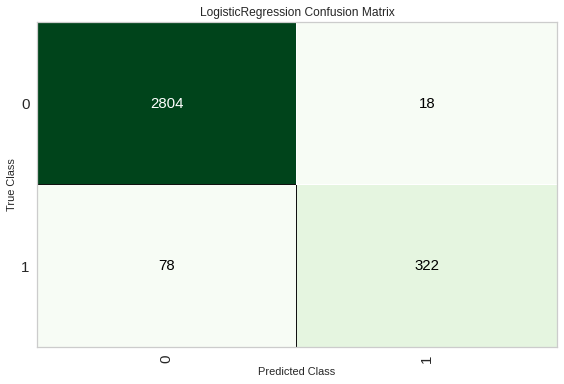

In [ ]:
plot_model(tuned_lr, plot='confusion_matrix')

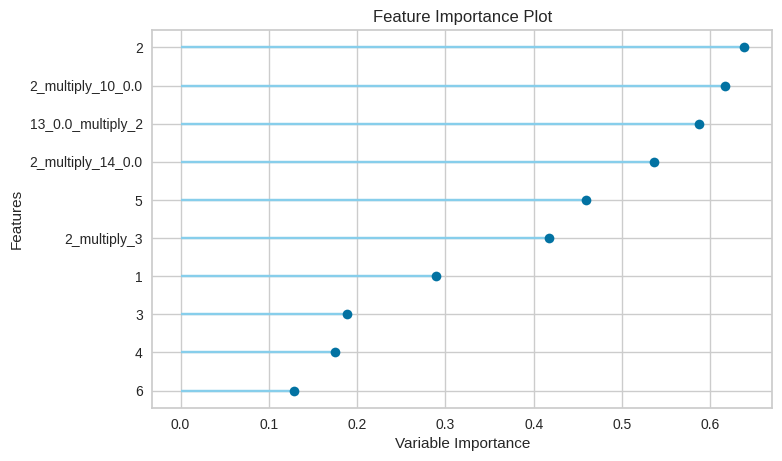

In [ ]:
plot_model(tuned_lr, plot='feature')

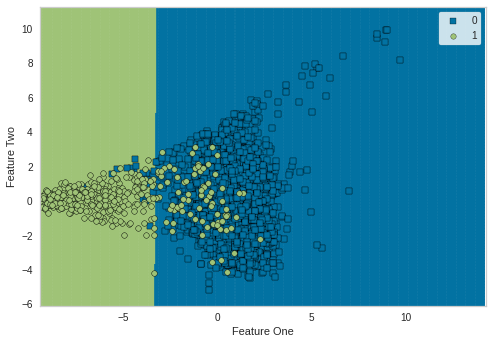

In [ ]:
plot_model(tuned_lr, plot='boundary')

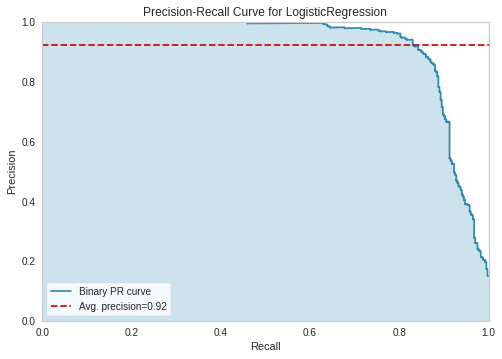

In [ ]:
plot_model(tuned_lr, plot='pr')

In [ ]:
#traing on the whole dataset
finalize_model(tuned_lr)
#predictiing on test data
test_predictions = predict_model(tuned_lr, data=dft)
#storing the predictions in another dataframe and converting the dataframe to a csv file.
test_predictions.rename(columns = {'Label':'customer_category'}, inplace = True)
sub = test_predictions[['customer_id','customer_category']]
sub.to_csv("sub_tuned_lr1.csv",index=False)

####Testing

In [ ]:
#blending tuned ridge and tuned xgboost classifier.
blender = blend_models(estimator_list = [tuned_ridge, tuned_lda, tuned_lr],optimize = 'Precision')
predict_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9681,0.0,0.7778,0.9459,0.8537,0.8359,0.8410
1,0.9694,0.0,0.7778,0.9589,0.8589,0.8420,0.8478
2,0.9734,0.0,0.8333,0.9375,0.8824,0.8674,0.8693
3,0.9787,0.0,0.8222,1.0000,0.9024,0.8906,0.8960
4,0.9734,0.0,0.8000,0.9730,0.8780,0.8633,0.8685
5,0.9814,0.0,0.8539,0.9870,0.9157,0.9053,0.9083
6,0.9694,0.0,0.7865,0.9459,0.8589,0.8419,0.8464
7,0.9627,0.0,0.7416,0.9296,0.8250,0.8044,0.8109
8,0.9614,0.0,0.7303,0.9286,0.8176,0.7964,0.8035
9,0.9760,0.0,0.8202,0.9733,0.8902,0.8769,0.8809


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9677,0.885,0.775,0.9568,0.8564,0.8384,0.8443


,14_0.0,3,2,4,6,13_0.0,11_0.0,5,16_0.0,0,12_1.0,10_0.0,9_0.0,7,1,15_0.0,2_multiply_10_0.0,4_multiply_3,2_multiply_14_0.0,13_0.0_multiply_2,2_multiply_3,8,Label
0,1.0,-0.182592,0.279266,-0.591480,-0.157164,1.0,0.0,0.086460,1.0,0.526294,0.0,1.0,1.0,0.513537,-0.702950,0.0,0.279266,0.108000,0.279266,0.279266,-0.050992,0.0,0.0
1,1.0,1.675213,0.860854,-0.874323,-0.036938,0.0,1.0,-1.538630,1.0,-0.213728,0.0,1.0,1.0,0.775189,-1.153058,1.0,0.860854,-1.464677,0.860854,0.000000,1.442113,0.0,0.0
2,0.0,-0.668987,-1.573904,-1.050545,2.381369,1.0,0.0,-1.206366,1.0,-0.221540,0.0,1.0,1.0,1.885866,-0.730561,1.0,-1.573904,0.702801,-0.000000,-1.573904,1.052921,0.0,0.0
3,0.0,-0.057075,-0.276833,-0.893534,2.045808,1.0,1.0,-1.969917,1.0,0.417543,0.0,1.0,1.0,2.086109,-0.034891,1.0,-0.276833,0.050998,-0.000000,-0.276833,0.015800,0.0,0.0
4,1.0,0.785349,0.500688,-0.735205,-0.271918,1.0,0.0,-0.116247,1.0,0.411087,0.0,1.0,1.0,-0.362152,0.216882,0.0,0.500688,-0.577393,0.500688,0.500688,0.393215,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1.0,0.468210,-0.288951,-0.783299,0.901436,1.0,1.0,-0.217436,1.0,-0.074770,0.0,1.0,1.0,0.218865,-1.534495,0.0,-0.288951,-0.366749,-0.288951,-0.288951,-0.135290,0.0,0.0
3218,1.0,-0.106781,0.281967,-0.150214,0.444149,0.0,1.0,-0.123471,1.0,1.422315,0.0,1.0,1.0,0.065918,0.727366,1.0,0.281967,0.016040,0.281967,0.000000,-0.030109,0.0,0.0
3219,1.0,-0.058458,0.140988,-0.550903,0.303690,1.0,1.0,-0.601174,1.0,-0.149469,0.0,1.0,1.0,0.714450,-0.222263,0.0,0.140988,0.032204,0.140988,0.140988,-0.008242,0.0,0.0
3220,1.0,0.796796,0.668520,-0.426410,1.164413,1.0,0.0,-0.491630,1.0,-0.416473,0.0,1.0,1.0,0.910481,-0.955214,0.0,0.668520,-0.339762,0.668520,0.668520,0.532674,0.0,0.0


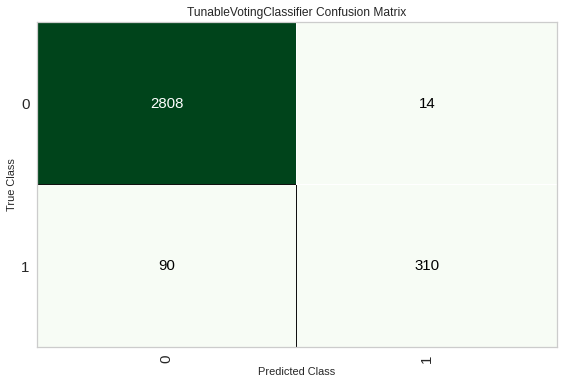

In [ ]:
plot_model(blender, plot='confusion_matrix')

In [ ]:
#Finalizing the Model for Deployment
finalize_model(blender)
#predict for test data
test_predictions = predict_model(blender, data=dft)
test_predictions.rename(columns = {'Label':'customer_category'}, inplace = True)

In [ ]:
sub = test_predictions[['customer_id','customer_category']]
sub.to_csv("sub_blend.csv",index=False)